In [23]:
import random as rd

randomm = ["duma ah poo", "duma ah sour", "duma ah chak", "duma ah tou","hg yey tha steav mg ha", "hoy steav","ah chak ah pongkdor","ah poo ah pongkdor","ah sour ah pongkdor"]
random1 = ["hello","hi","ey ke ey ke"]
while True:
    n = input("Enter: ")
    if n == 'q':
        break
    elif n == "j pouk vea":
        random_item = rd.choice(randomm)
        print("output:",random_item)
    else:
        random2 = rd.choice(random1)
        print('output:',random2)


Enter: j pouk vea
output: ah sour ah pongkdor
Enter: q


In [116]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [139]:
import requests

url = 'https://lenghub1.github.io/chatbot/bot.json'
response = requests.get(url)

if response.status_code == 200:
    data = response.json() 
print(data['intents'])

[{'tag': 'greeting', 'patterns': ['Hello there!', 'Hi', 'Hey!', 'Greetings', 'Howdy', 'Hi, what can you do?', 'Hello, chatbot', 'Hi, chatbot', 'Hey, there!', 'Good day'], 'responses': ['Hello! How can I assist you today?', 'Hi! What can I do for you?', 'Hey! How can I help you?', 'Greetings! How may I assist you?', 'Howdy! What can I help you with?', "Hello! I'm here to assist you with any questions or requests.", 'Hi there! How can I assist you today?', 'Hello, chatbot! How can I be of service?', 'Hi, chatbot! What can I assist you with?', 'Hey there! How may I assist you?']}, {'tag': 'product_search', 'patterns': ['Find me a smartphone', 'Looking for laptops', 'Show me clothing', 'Recommend electronics', 'Search for gadgets', 'Find tech products', "What's in the tech section?", 'Tell me about your fashion items', 'Show me your product catalog', "I'm interested in purchasing"], 'responses': ['Sure! We have a wide range of products. What are you looking for?', 'Of course! We have a var

In [140]:
tags = []
inputs = []
responses ={}
for intent in data["intents"]:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [141]:
data = pd.DataFrame({'inputs': inputs, "tags": tags})

In [142]:
data

,inputs,tags
0,Hello there!,greeting
1,Hi,greeting
2,Hey!,greeting
3,Greetings,greeting
4,Howdy,greeting
5,"Hi, what can you do?",greeting
6,"Hello, chatbot",greeting
7,"Hi, chatbot",greeting
8,"Hey, there!",greeting
9,Good day,greeting


In [143]:
data = data.sample(frac=1)

In [144]:
# Pre-processing

import string
import string

data['inputs'] = data['inputs'].apply(lambda wrd: ''.join([ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation]))
data['inputs'] = data['inputs'].apply(lambda wrd : ''.join(wrd))
data

,inputs,tags
34,whats in your plant store,product
29,what can you tell me about this,product_details
26,give me some information,product_details
32,show me your plant merchandise,product
15,find tech products,product_search
30,tell me about your plant products,product
12,show me clothing,product_search
14,search for gadgets,product_search
23,can you give me details about the jeans,product_details
5,hi what can you do,greeting


In [145]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [146]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

In [147]:
x_train = pad_sequences(train)

In [148]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [149]:
input_shape = x_train.shape[1]
print(input_shape)
vocabular = len(tokenizer.word_index)
print(vocabular)
output_len = le.classes_.shape[0]
print(output_len)

8
72
4


In [150]:
i = Input(shape=(input_shape,))
x = Embedding(vocabular + 1, 10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_len, activation="softmax")(x)
model = Model(i, x)

In [151]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 5ms/step - loss: 1.3874 - accuracy: 0.1667
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 1.3851 - accuracy: 0.2500
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3833 - accuracy: 0.4444
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3816 - accuracy: 0.3889
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3800 - accuracy: 0.4167
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3784 - accuracy: 0.4722
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3768 - accuracy: 0.5278
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3751 - accuracy: 0.5278
Epoch 9/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3733 - accuracy: 0.5278
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3715 - accuracy: 0.5556
Epoch 11/200
2/2 [===========

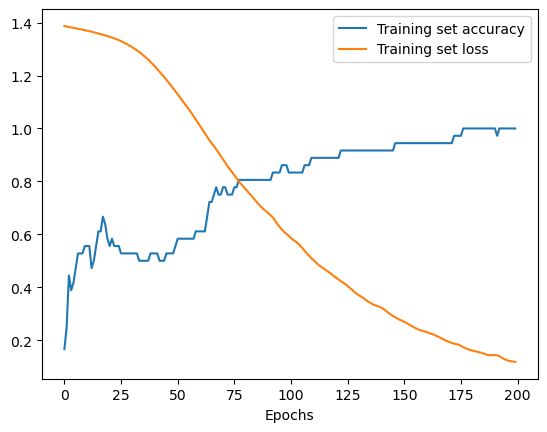

In [152]:
import matplotlib.pyplot as plt

plt.plot(train.history['accuracy'], label='Training set accuracy')

plt.plot(train.history['loss'], label='Training set loss')

plt.legend()
plt.xlabel('Epochs')
plt.show()


In [153]:
import random
import string

def chat_with_bot(model, tokenizer, le, responses, input_shape):
    while True:
        print()
        prediction_input = input('You: ')
        if prediction_input.lower() == 'bye':
            print()
            print("Ah pongdor chak: Goodbye!")
            break

        prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
        prediction_input = ''.join(prediction_input)

        texts_p = [prediction_input]
        prediction_input = tokenizer.texts_to_sequences(texts_p)
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)
        output = model.predict(prediction_input, verbose=0)
        output = output.argmax()

        response_tag = le.inverse_transform([output])[0]
        print()
        print('Ah pongdor Chak: ', random.choice(responses[response_tag]))

chat_with_bot(model, tokenizer, le, responses, input_shape)



You: hi

Ah pongdor Chak:  Hello! I'm here to assist you with any questions or requests.

You: help me find product

Ah pongdor Chak:  Our tech section has a variety of gadgets. What kind of tech product are you interested in?

You: bye

Ah pongdor chak: Goodbye!
